In [2]:
import pandas as pd
import seaborn as sns

In [118]:
test = pd.read_csv("titanic/test.csv")
train = pd.read_csv("titanic/train.csv")

In [30]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
all_useless_columns = ['Cabin','Ticket','Name','Fare']
train = train.drop(all_useless_columns,axis = 1)
test = test.drop(all_useless_columns, axis = 1)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [35]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [64]:
train_copy = train.copy()
test_copy = test.copy()
train_copy

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


### Rozwiazywanie kwestii brakujacych wartosci
___

In [40]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [45]:
train['Age'].mode()[0] # najszeczsiej wystepujacy wiek paserzerow statku

24.0

In [54]:
# zamieniam wszystkie None na mode w columnie Age

def input_data(data):
    data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

input_data(train_copy)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female  24.0      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       

In [86]:
train_copy['Age'] = train_copy['Age'].fillna(train_copy['Age'].mean())

In [88]:
def input_data(data):
    #zamieniam wartosci Nan na sredni wiek paserzerow
    data['Age'] = data['Age'].fillna(data['Age'].mean()) 
    
    #zamieniam wartosci Nan na dominante clasu czyli 'S'
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    return data

In [121]:
train_full = input_data(train_copy)
test_full = input_data(test_copy)
test_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,22.0,0,0,7.8292,Q
1,893,3,female,38.0,1,0,7.0000,S
2,894,2,male,26.0,0,0,9.6875,Q
3,895,3,male,35.0,0,0,8.6625,S
4,896,3,female,35.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,24.0,0,0,8.0500,S
414,1306,1,female,44.0,0,0,108.9000,C
415,1307,3,male,24.0,0,0,7.2500,S
416,1308,3,male,34.0,0,0,8.0500,S


### Wizualizacja danych
___

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


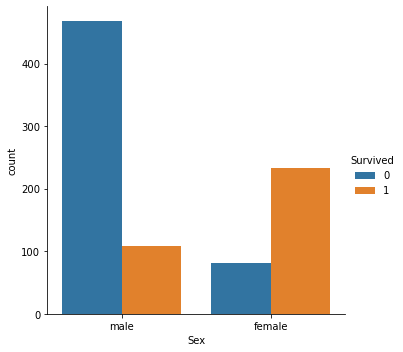

In [102]:
# w danym wykresie widac ze wiekszosc mężczyzn umarło na statku
sns.catplot("Sex", data = train_full, hue = 'Survived', kind = 'count')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


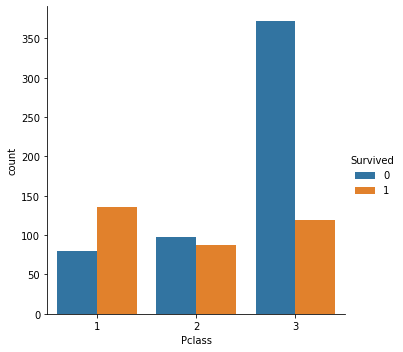

In [104]:
# w danym wykresie widac ze wiecej pasazerow umarlo w 3 clasie, wiec moge zrobic wnisek
# ze jezeli jestes mezczyzna , i jedziesz 3 clasa wiec jest duza szansa ze zaginiesz
sns.catplot('Pclass', data=train_full, hue = 'Survived', kind ='count')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


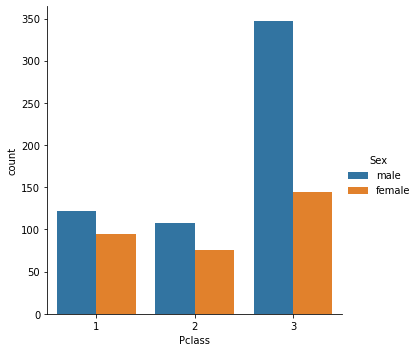

In [106]:
# na danym wykresie widac ze biednych mezczyzn bylo najwiecej
sns.catplot('Pclass', data = train_full, hue = 'Sex', kind = 'count')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


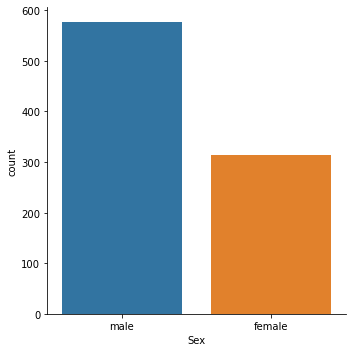

In [110]:
sns.catplot('Sex', data = train_full, kind = 'count')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


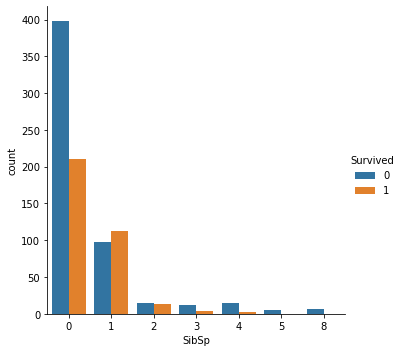

In [126]:
# dany wykres pokazuje ze jezeli pasazer mial rodzeństwo, lub małżonek to szansa przezyc byla wiecej
# SibSp - to jest liczebnosc rodzeństwo + małżonek (sibiling+spouse = SibSp)
sns.catplot('SibSp', data = train_full, hue = 'Survived', kind = 'count')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


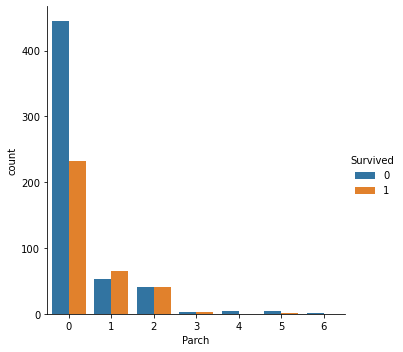

In [129]:
# tutaj widac ze jezeli pasazer mial rodzicow lub dzicka do szansa przezyc byla wiecej
# Parch - liczbenosc parents + children 
sns.catplot("Parch", data = train_full, hue = 'Survived', kind = 'count')

In [154]:
train_full['Family_size'] = train_full['SibSp'] + train_full['Parch']
test_full['Family_size'] = train_full['SibSp'] + train_full['Parch']

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


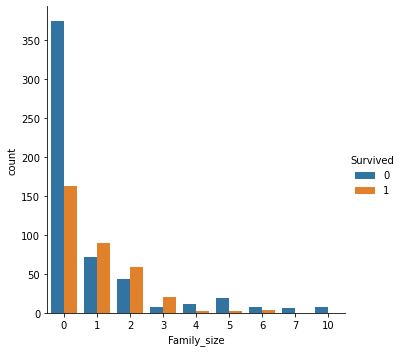

In [136]:
sns.catplot('Family_size', data = train_full, hue = 'Survived', kind = 'count')

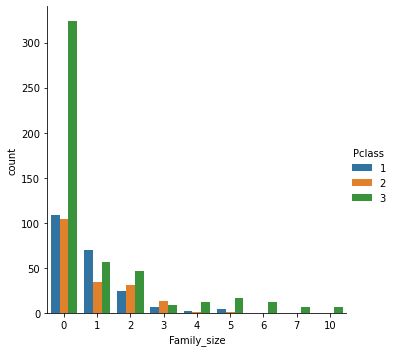

In [252]:
# W danym wykresie widac ze te osoby ktorzy mialy 1 osoby na statku, byly zwykle w 1 klasie, 
# i mialy wieksza szanse przezyc
sns.catplot("Family_size", data = train_full, hue = 'Pclass', kind = 'count')

### Zapisuje dane do pliku
___

In [156]:
train_full.to_csv("titanic/train_full.csv")
test_full.to_csv("titanic/test_full.csv")

### Prosty przyklad baseline model (desicion stump)
___

In [157]:
test_full

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,892,3,male,22.0,0,0,7.8292,Q,1
1,893,3,female,38.0,1,0,7.0000,S,1
2,894,2,male,26.0,0,0,9.6875,Q,0
3,895,3,male,35.0,0,0,8.6625,S,1
4,896,3,female,35.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,24.0,0,0,8.0500,S,0
414,1306,1,female,44.0,0,0,108.9000,C,0
415,1307,3,male,24.0,0,0,7.2500,S,0
416,1308,3,male,34.0,0,0,8.0500,S,2


In [162]:
(test_full['Sex'] == 'male') & (test_full['Pclass'] == 3)

0       True
1      False
2      False
3       True
4      False
       ...  
413     True
414    False
415     True
416     True
417     True
Length: 418, dtype: bool

In [226]:
pred = ((test_full['Sex'] == 'male') & (test_full['Pclass'] == 3) \
         & (test_full['Family_size'] != 1) & (test_full['Family_size'] != 2))
simple_pred2 = (~(pred)).astype(int).values
simple_pred2

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,

In [230]:
simple_pred = (~(test_full['Sex'] == 'male') & (test_full['Pclass'] == 3)).astype(int).values
simple_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [241]:
simple_pred3 = test_full['Family_size'] != 2
simple_pred3 

0       True
1       True
2       True
3       True
4       True
       ...  
413     True
414     True
415     True
416    False
417    False
Name: Family_size, Length: 418, dtype: bool

In [242]:
test_full

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,892,3,male,22.0,0,0,7.8292,Q,1
1,893,3,female,38.0,1,0,7.0000,S,1
2,894,2,male,26.0,0,0,9.6875,Q,0
3,895,3,male,35.0,0,0,8.6625,S,1
4,896,3,female,35.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,24.0,0,0,8.0500,S,0
414,1306,1,female,44.0,0,0,108.9000,C,0
415,1307,3,male,24.0,0,0,7.2500,S,0
416,1308,3,male,34.0,0,0,8.0500,S,2


### Rejestracja wyniku
___

In [179]:
def make_prediction_file(prediction, test_data, name: str):
    result = pd.DataFrame(
                {
                    'PassengerId': test_data.reset_index()['PassengerId'],
                    'Survived' : prediction
                }
    )
    result.to_csv(name, index = False)

In [231]:
make_prediction_file(simple_pred,test_full,'titanic_simple_baseline.csv')